# ANPR Image Preprocessing: Step-by-Step Notebook

This notebook demonstrates the key image preprocessing steps for Automatic Number Plate Recognition (ANPR) based on the article [ANPR Series Part 1: Advanced Image Preprocessing Techniques](https://henok.cloud/articles/anpr-part-1-image-preprocessing/).

**Outline:**
1. Import Required Libraries
2. Load and Display the Input Image
3. Convert Image to Grayscale
4. Apply Gaussian Blur
5. Perform Edge Detection
6. Apply Morphological Operations
7. Find and Draw Contours

---

## 1. Import Required Libraries
We will use OpenCV, NumPy, and Matplotlib for image processing and visualization.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# For notebook display
%matplotlib inline

## 2. Load and Display the Input Image

Let's load a sample number plate image using OpenCV and display it using Matplotlib. Replace `'sample_plate.jpg'` with your own image file if needed.

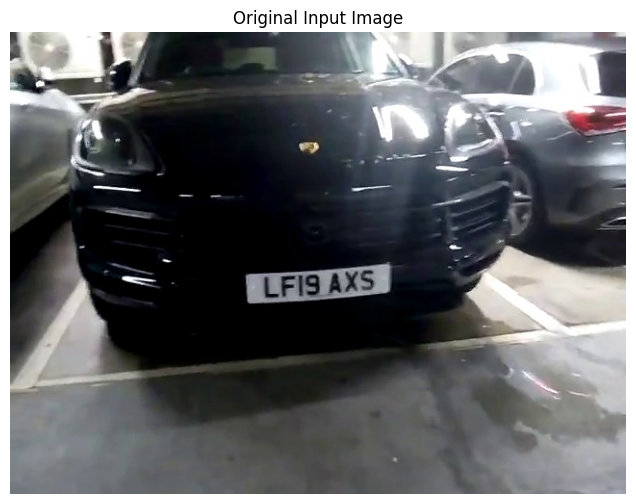

In [8]:
# Load the image (replace with your image path)
image_path = './sample_images/1.jpg'  # Update this path as needed
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge detection and contour finding

plate_text = None
plate_roi = None

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")

# Convert BGR (OpenCV default) to RGB for Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original Input Image')
plt.axis('off')
plt.show()

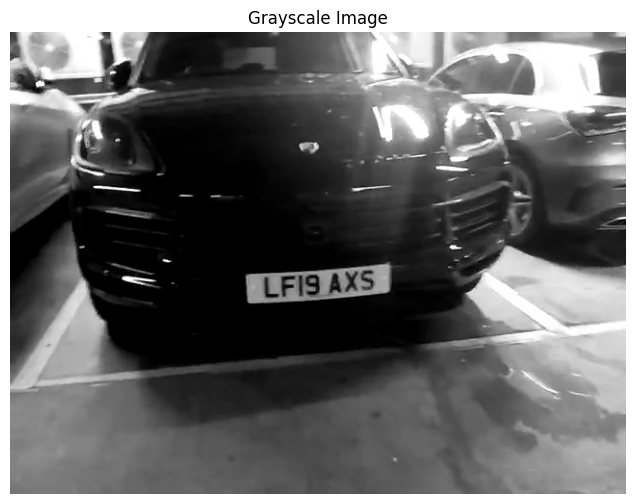

In [9]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

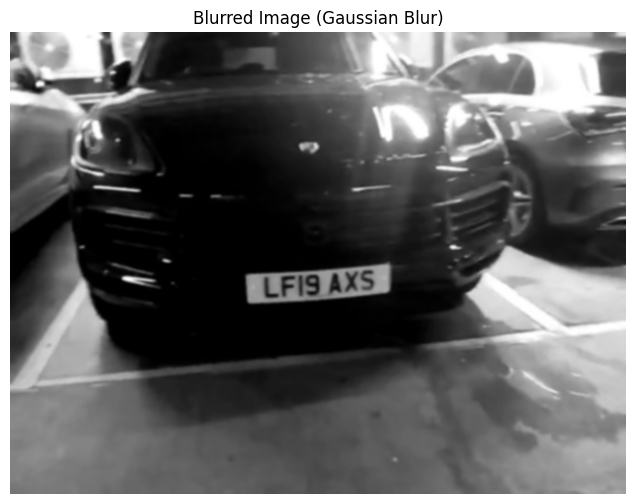

In [10]:
# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(figsize=(8, 6))
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')
plt.axis('off')
plt.show()

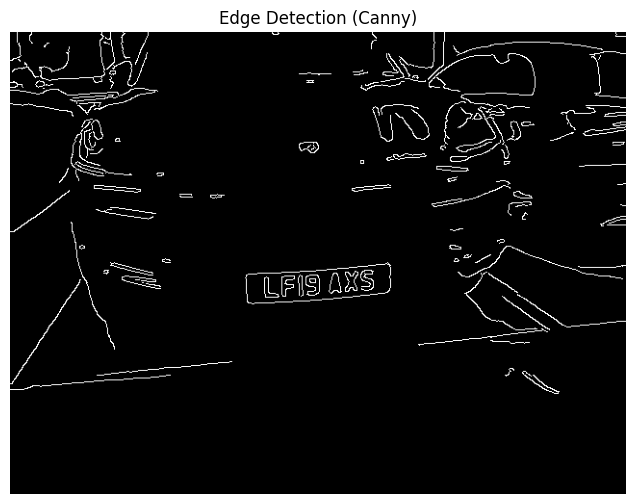

In [ ]:
# Perform Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')
plt.show()

Detected plate: None
Detected plate: None


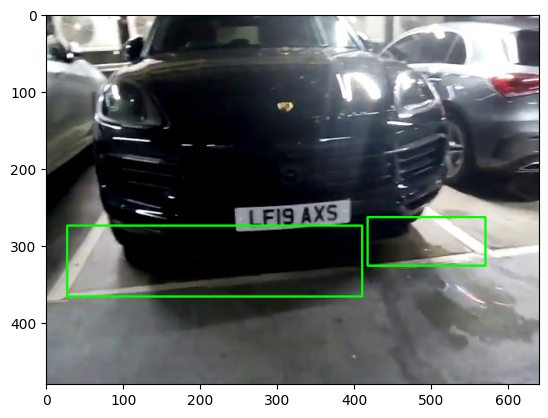

In [7]:

plate_text = None
plate_roi = None

# Contour filtering
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    
    # Basic license plate aspect ratio check
    if 2.0 < aspect_ratio < 6.0 and 100 < w < 500 and 50 < h < 200:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Extract the potential license plate region
        plate_roi = gray[y:y+h, x:x+w]
        
        # Apply some preprocessing for better OCR results
        #plate_roi = cv2.threshold(plate_roi, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        #plate_roi = cv2.medianBlur(plate_roi, 3)
        
        # Use Tesseract to extract text
        
        # Print and display the result
        print(f"Detected plate: {plate_text}")
        cv2.putText(image, plate_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()